<center><h1>Homework Assignment #1</h1></center>
<table width="100%">
    <tr>
        <td><img src="../images/img0.jpg" /></td>
    </tr>
</table>

- To explore the basic data manipulation verbs of `dplyr`, we’ll use `nycflights13::flights`. 
- This data frame contains all 336,776 flights that departed from New York City in 2013.

In [22]:
library("nycflights13")
library("tidyverse")

head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


*Student: The `Conflicts` are not a problem for this homework. They should be fixed for future-proofing, however.*

In [23]:
# Check versions
packageVersion("tidyverse")
packageVersion("tidyselect")

[1] ‘1.3.1’

[1] ‘1.1.1’

In [24]:
# Convert to dataframe for easier handling
df = as.data.frame(flights)
head(df) 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


**Instructions**
1. Find all flights that:
    1. Had an arrival delay of two or more hours
    2. Flew to Houston (IAH or HOU)
    3. Were operated by United, American, or Delta
    4. Departed in summer (July, August, and September)
    5. Arrived more than two hours late, but didn’t leave late
    6. Were delayed by at least an hour, but made up over 30 minutes in flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2,2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
3,2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
4,2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
5,2013,1,1,1505,1310,115,1638,1431,127,EV,4497,N17984,EWR,RIC,63,277,13,10,2013-01-01 13:00:00
6,2013,1,1,1525,1340,105,1831,1626,125,B6,525,N231JB,EWR,MCO,152,937,13,40,2013-01-01 13:00:00


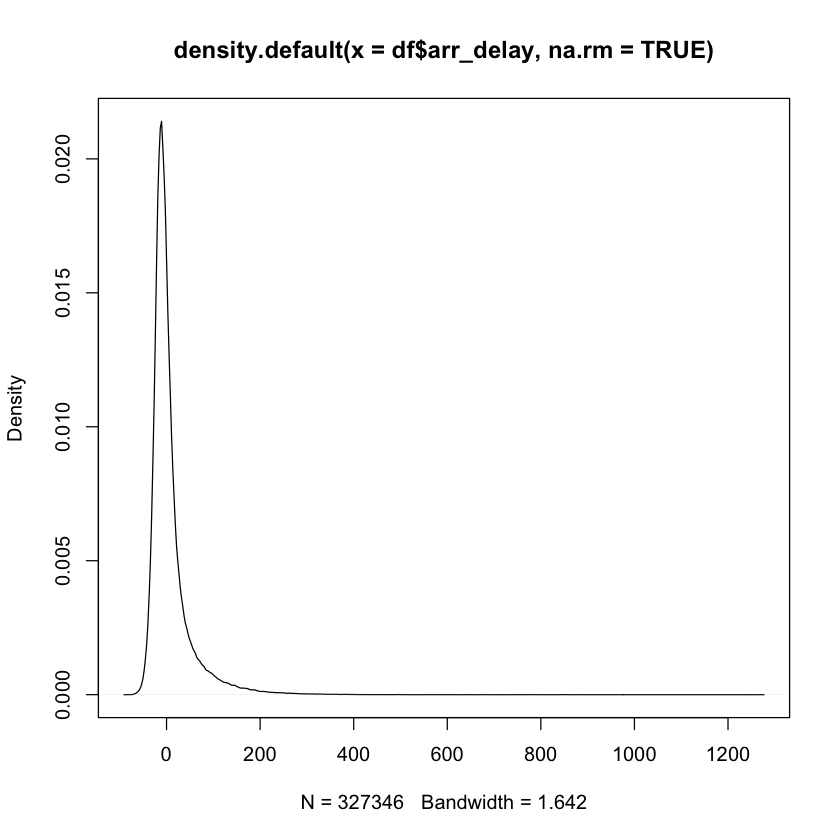

In [51]:
# A. Had an arrival delay of two or more hours (120 mins)

# Given values of 'arr_delay' (x-axis of density plot), these seem to be reported in minutes as unit
d <- density(df$arr_delay, na.rm = TRUE)
plot(d)

# Report flights with 120 or more mins arrival delays
head(filter(df, arr_delay >= 120))

In [27]:
# B. Flew to Houston (IAH or HOU)
head(filter(df, dest == 'IAH' | dest == 'HOU'))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00
4,2013,1,1,728,732,-4,1041,1038,3,UA,473,N488UA,LGA,IAH,238,1416,7,32,2013-01-01 07:00:00
5,2013,1,1,739,739,0,1104,1038,26,UA,1479,N37408,EWR,IAH,249,1400,7,39,2013-01-01 07:00:00
6,2013,1,1,908,908,0,1228,1219,9,UA,1220,N12216,EWR,IAH,233,1400,9,8,2013-01-01 09:00:00


In [28]:
# C. Were operated by United, American, or Delta
head(unique(df[c("carrier")])) #UA is United, AA is American, DL is Delta

# Report flights operated by said carriers
head(filter(df, carrier == 'UA' | carrier == 'AA' | carrier == 'DL'))

,carrier
,<chr>
1,UA
3,AA
4,B6
5,DL
8,EV
19,MQ


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
6,2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [29]:
# D. Departed in summer (July, August, and September)
head(filter(df, month == 7 | month == 8 | month == 9))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2,2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
3,2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
4,2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
5,2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
6,2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00


In [30]:
# E. Arrived more than two hours late, but didn’t leave late
head(filter(df, arr_delay >= 120 & dep_delay <= 0))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,27,1419,1420,-1,1754,1550,124,MQ,3728,N1EAMQ,EWR,ORD,135,719,14,20,2013-01-27 14:00:00
2,2013,10,7,1350,1350,0,1736,1526,130,EV,5181,N611QX,LGA,MSN,117,812,13,50,2013-10-07 13:00:00
3,2013,10,7,1357,1359,-2,1858,1654,124,AA,1151,N3CMAA,LGA,DFW,192,1389,13,59,2013-10-07 13:00:00
4,2013,10,16,657,700,-3,1258,1056,122,B6,3,N703JB,JFK,SJU,225,1598,7,0,2013-10-16 07:00:00
5,2013,11,1,658,700,-2,1329,1015,194,VX,399,N629VA,JFK,LAX,336,2475,7,0,2013-11-01 07:00:00
6,2013,3,18,1844,1847,-3,39,2219,140,UA,389,N560UA,JFK,SFO,386,2586,18,47,2013-03-18 18:00:00


In [33]:
# F. Were delayed by at least an hour, but made up over 30 minutes in flight
head(filter(df, dep_delay >= 60, dep_delay - arr_delay > 30))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,2205,1720,285,46,2040,246,AA,1999,N5DNAA,EWR,MIA,146,1085,17,20,2013-01-01 17:00:00
2,2013,1,1,2326,2130,116,131,18,73,B6,199,N594JB,JFK,LAS,290,2248,21,30,2013-01-01 21:00:00
3,2013,1,3,1503,1221,162,1803,1555,128,UA,551,N835UA,EWR,SFO,320,2565,12,21,2013-01-03 12:00:00
4,2013,1,3,1839,1700,99,2056,1950,66,AA,575,N631AA,JFK,EGE,239,1747,17,0,2013-01-03 17:00:00
5,2013,1,3,1850,1745,65,2148,2120,28,AA,177,N332AA,JFK,SFO,314,2586,17,45,2013-01-03 17:00:00
6,2013,1,3,1941,1759,102,2246,2139,67,UA,979,N402UA,EWR,PHX,274,2133,17,59,2013-01-03 17:00:00


2. How many flights have a missing `dep_time`? What other variables are missing? What might these rows represent?

In [50]:
# Report no. of missing values for depature time. Output = 8,255
sum(is.na(df$dep_time))

[1] 8255

In [49]:
# Report missing values for all variables:
colSums(is.na(df) )

#'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time' all have missing values. 
# This could point towards that the missing values are cancelled flights.

year          month            day       dep_time sched_dep_time 
             0              0              0           8255              0 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
          8255           8713              0           9430              0 
        flight        tailnum         origin           dest       air_time 
             0           2512              0              0           9430 
      distance           hour         minute      time_hour 
             0              0              0              0

3. How could you use `arrange()` to sort all missing values to the start? (Hint: use is.na().)

*Student: `arrange()` sorts rows of df according to selected columns. `desc()` makes sure it is in descending order. However, this only works as long as `is.na()` is passed as well as presented in cell below. The reason is that `is.na()` outputs either `TRUE` or `FALSE` and `R` orders `TRUE > FALSE`.*

In [48]:
# Report flights with missing values at the top
flights %>% 
    arrange(desc(is.na(dep_time)),
           desc(is.na(dep_delay)),
           desc(is.na(arr_time)), 
           desc(is.na(arr_delay)),
           desc(is.na(tailnum)),
           desc(is.na(air_time))) %>%
    head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,2,NA,1545,NA,NA,1910,NA,AA,133,NA,JFK,LAX,NA,2475,15,45,2013-01-02 15:00:00
2013,1,2,NA,1601,NA,NA,1735,NA,UA,623,NA,EWR,ORD,NA,719,16,1,2013-01-02 16:00:00
2013,1,3,NA,857,NA,NA,1209,NA,UA,714,NA,EWR,MIA,NA,1085,8,57,2013-01-03 08:00:00
2013,1,3,NA,645,NA,NA,952,NA,UA,719,NA,EWR,DFW,NA,1372,6,45,2013-01-03 06:00:00
2013,1,4,NA,845,NA,NA,1015,NA,9E,3405,NA,JFK,DCA,NA,213,8,45,2013-01-04 08:00:00
2013,1,4,NA,1830,NA,NA,2044,NA,9E,3716,NA,EWR,DTW,NA,488,18,30,2013-01-04 18:00:00


4. Sort flights to find the fastest flights.

In [42]:
# Here we can simply use `arrange()` as the variables `air_time` is of type 'double', i.e. numeric.
head(arrange(df, air_time))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,16,1355,1315,40,1442,1411,31,EV,4368,N16911,EWR,BDL,20,116,13,15,2013-01-16 13:00:00
2,2013,4,13,537,527,10,622,628,-6,EV,4631,N12167,EWR,BDL,20,116,5,27,2013-04-13 05:00:00
3,2013,12,6,922,851,31,1021,954,27,EV,4276,N27200,EWR,BDL,21,116,8,51,2013-12-06 08:00:00
4,2013,2,3,2153,2129,24,2247,2224,23,EV,4619,N13913,EWR,PHL,21,80,21,29,2013-02-03 21:00:00
5,2013,2,5,1303,1315,-12,1342,1411,-29,EV,4368,N13955,EWR,BDL,21,116,13,15,2013-02-05 13:00:00
6,2013,2,12,2123,2130,-7,2211,2225,-14,EV,4619,N12921,EWR,PHL,21,80,21,30,2013-02-12 21:00:00


5. Which flights traveled the longest? Which traveled the shortest?

In [47]:
# Report flights with longest traveled distance
head(arrange(df, desc(distance)))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2,2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
3,2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
4,2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
5,2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
6,2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


In [56]:
# Report flights with shortest traveled distance
head(arrange(df, distance))

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,7,27,NA,106,NA,NA,245,NA,US,1632,NA,EWR,LGA,NA,17,1,6,2013-07-27 01:00:00
2,2013,1,3,2127,2129,-2,2222,2224,-2,EV,3833,N13989,EWR,PHL,30,80,21,29,2013-01-03 21:00:00
3,2013,1,4,1240,1200,40,1333,1306,27,EV,4193,N14972,EWR,PHL,30,80,12,0,2013-01-04 12:00:00
4,2013,1,4,1829,1615,134,1937,1721,136,EV,4502,N15983,EWR,PHL,28,80,16,15,2013-01-04 16:00:00
5,2013,1,4,2128,2129,-1,2218,2224,-6,EV,4645,N27962,EWR,PHL,32,80,21,29,2013-01-04 21:00:00
6,2013,1,5,1155,1200,-5,1241,1306,-25,EV,4193,N14902,EWR,PHL,29,80,12,0,2013-01-05 12:00:00


6. What does the `all_of()` and the `any_of()` functions do? Why might they be helpful in conjunction with this vector?
> `vars <- c("year", "month", "day", "dep_delay", "arr_delay")`

In [53]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay")

*Student: From `tidyselect`, `all_of()` will return error if any of the variables/elements of vector `vars` is not in the applied dataframe. `any_of()` will work even if some variables/elements of vector `vars` is not in applied dataframe. `any_of()` is e.g. useful when removing variables from a dataframe and some might not be in the specified list but the user does not care about this - she just wants to make sure that all of these variables are excluded from the resulting dataframe.*

In [57]:
# Your solution.
df %>% select(all_of(vars)) %>% head()

,year,month,day,dep_delay,arr_delay
,<int>,<int>,<int>,<dbl>,<dbl>
1,2013,1,1,2,11
2,2013,1,1,4,20
3,2013,1,1,2,33
4,2013,1,1,-1,-18
5,2013,1,1,-6,-25
6,2013,1,1,-4,12


In [58]:
df %>% select(any_of(vars)) %>% head()

,year,month,day,dep_delay,arr_delay
,<int>,<int>,<int>,<dbl>,<dbl>
1,2013,1,1,2,11
2,2013,1,1,4,20
3,2013,1,1,2,33
4,2013,1,1,-1,-18
5,2013,1,1,-6,-25
6,2013,1,1,-4,12


7. What does the sort argument to count() do? When might you use it?

*Student: The `sort` argument of `count()` is boolean and if set to `TRUE` will show the largest groups at the top. So, it is useful if we the user is most interested in the high numbers for a given group. `sort = FALSE` is the default and does not sort.*

In [60]:
df %>% count(carrier, sort = TRUE) %>% head()

df %>% count(carrier, sort = FALSE) %>% head()

,carrier,n
,<chr>,<int>
1,UA,58665
2,B6,54635
3,EV,54173
4,DL,48110
5,AA,32729
6,MQ,26397


,carrier,n
,<chr>,<int>
1,9E,18460
2,AA,32729
3,AS,714
4,B6,54635
5,DL,48110
6,EV,54173


8. What time of day should you fly if you want to avoid delays as much as possible?

In [63]:
# From output below we see that flying at 7 AM has the lowest delays on average
df %>% 
    group_by(hour) %>% 
    summarize(Mean = mean(arr_delay, na.rm=TRUE)) %>% 
    arrange(Mean) %>% 
    head()

hour,Mean
<dbl>,<dbl>
7,-5.3044716
5,-4.7969072
6,-3.3844854
9,-1.4514074
8,-1.1132266
10,0.9539401


9. For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination.

In [67]:
df %>% 
    filter(arr_delay >0) %>% #include only delayed flights
    group_by(dest) %>% 
    mutate(arr_delay_tot = sum(arr_delay),
      arr_delay_prop = arr_delay / arr_delay_tot) %>% 
    select(dest, month, day, dep_time, carrier, flight, #select only some variables for readability of resulting table
       arr_delay, arr_delay_tot, arr_delay_prop) %>%
    arrange(dest, desc(arr_delay_prop)) 

dest,month,day,dep_time,carrier,flight,arr_delay,arr_delay_tot,arr_delay_prop
<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ABQ,7,22,2145,B6,1505,153,4487,0.03409851
ABQ,12,14,2223,B6,65,149,4487,0.03320704
ABQ,10,15,2146,B6,65,138,4487,0.03075552
ABQ,7,23,2206,B6,1505,137,4487,0.03053265
ABQ,12,17,2220,B6,65,136,4487,0.03030978
ABQ,7,10,2025,B6,1505,126,4487,0.02808112
ABQ,7,30,2212,B6,1505,118,4487,0.02629819
ABQ,7,28,2038,B6,1505,117,4487,0.02607533
ABQ,12,8,2049,B6,65,114,4487,0.02540673
